In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import datetime
import email.utils as eutils
import time

import eppy as eppy
from eppy import modeleditor
from eppy.modeleditor import IDF
from eppy.runner.run_functions import runIDFs
import PySimpleGUI as sg
from PIL import Image, ImageTk
import os
from eppy.results import readhtml # the eppy module with functions to read the html
import subprocess
import os
from os import system

{'Misc. (E)': array([18.03, 18.03]), 'Vent Fan (E)': array([1.8 , 5.31]), 'Lg. Appl. (E)': array([13.96, 12.57]), 'Lights (E)': array([4.21, 4.21]), 'Cooling Fan/Pump (E)': array([3.42, 0.82]), 'Cooling (E)': array([12.8 ,  4.83]), 'Heating Fan/Pump (E)': array([21.06,  0.  ]), 'Heating (E)': array([33.27,  7.09]), 'Hot Water (E)': array([27.44,  6.59])}


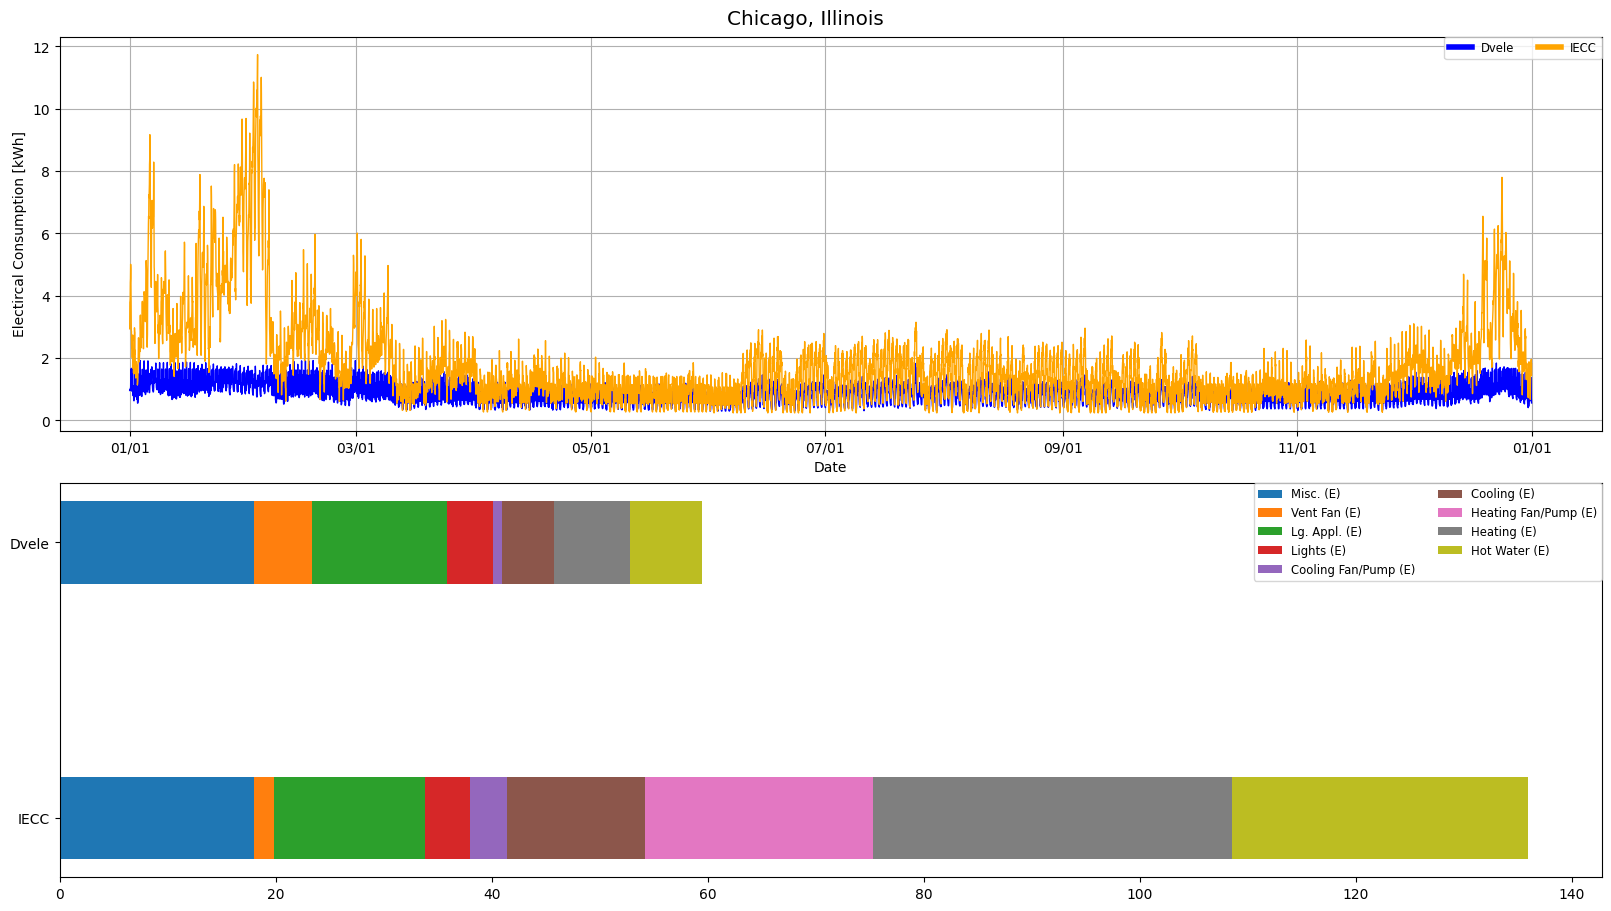

In [55]:
os.chdir('C:/Consulting/2024-001_Hourly Study/01_Model/Hourly Outputs/')

dvele_case = pd.read_csv('Chicago.csv')

fig = plt.figure(layout='constrained', figsize=(16, 9))
fig.suptitle(('Chicago, Illinois'), fontsize='x-large')
ax = fig.subplot_mosaic([['hourly'],['annual']])

used = []

dvele_case['ts'] = pd.Timestamp('2018-01-01')+pd.to_timedelta(dvele_case['Hours since 00:00 Jan 1'], unit='H')
x = dvele_case['ts']
ax['hourly'].plot(x, dvele_case['Chicago Dvele - Fuel Use:  Electricity: Total (kWh)'],color='blue',linewidth=1,label='Dvele')
ax['hourly'].plot(x, dvele_case['User-Defined - Fuel Use:  Electricity: Total (kWh)'],color='orange',linewidth=1,label='IECC')
ax['hourly'].set_ylabel('Electircal Consumption [kWh]')
ax['hourly'].set_xlabel('Date')
ax['hourly'].grid(True)
leg = ax['hourly'].legend(ncol=2, loc='upper right', borderaxespad=0, fontsize='small')
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth=4)
ax['hourly'].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

end_uses = ['Misc. (E)','Vent Fan (E)', 'Lg. Appl. (E)', 'Lights (E)', 'Cooling Fan/Pump (E)','Cooling (E)', 
            'Heating Fan/Pump (E)', 'Heating, Backup (E)','Heating (E)', 'Hot Water (E)']
codes = ('IECC', 'Dvele')
cases = [0,1]
left = np.zeros(2)

# for case in cases:
case_data = {
    'Misc. (E)':np.array([dvele_case['Misc. (E)'][0],dvele_case['Misc. (E)'][1]]),
    'Vent Fan (E)':np.array([dvele_case['Vent Fan (E)'][0],dvele_case['Vent Fan (E)'][1]]),
    'Lg. Appl. (E)':np.array([dvele_case['Lg. Appl. (E)'][0],dvele_case['Lg. Appl. (E)'][1]]),
    'Lights (E)':np.array([dvele_case['Lights (E)'][0],dvele_case['Lights (E)'][0]]),
    'Cooling Fan/Pump (E)':np.array([dvele_case['Cooling Fan/Pump (E)'][0],dvele_case['Cooling Fan/Pump (E)'][1]]),
    'Cooling (E)':np.array([dvele_case['Cooling (E)'][0],dvele_case['Cooling (E)'][1]]),
    'Heating Fan/Pump (E)':np.array([dvele_case['Heating, Backup (E)'][0],dvele_case['Heating, Backup (E)'][1]]),
    'Heating (E)':np.array([dvele_case['Heating (E)'][0],dvele_case['Heating (E)'][1]]),
    'Hot Water (E)':np.array([dvele_case['Hot Water (E)'][0],dvele_case['Hot Water (E)'][1]])
}

width = 0.3  # the width of the bars: can also be len(x) sequence

print(case_data)

for var,data in case_data.items():
    y = ax['annual'].barh(codes,data,width,label=var,left=left)
    left += data
ax['annual'].legend(ncol=2, loc='upper right', borderaxespad=0, fontsize='small')

In [8]:
os.chdir('C:/Consulting/2024-001_Hourly Study/01_Model/Hourly Outputs/')

dvele_case = pd.read_csv('Chicago Dvele.csv')
dvele_case.head()

fig = plt.figure(layout='constrained', figsize=(16, 9))
fig.suptitle(('Hello'), fontsize='x-large')
ax = fig.subplot_mosaic([['hourly']])

used = []

x = dvele_case['Hours since 00:00 Jan 1']
# y = np.row_stack((dvele_case['Chicago Dvele - End Use:  Electricity: Hot Water (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Lighting Interior (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Lighting Exterior (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Mech Vent (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Refrigerator (kWh)'],
#                   Chicago Dvele - End Use:  Electricity: Dishwasher (kWh)
# Chicago Dvele - End Use:  Electricity: Clothes Washer (kWh)
# Chicago Dvele - End Use:  Electricity: Clothes Dryer (kWh)
# Chicago Dvele - End Use:  Electricity: Range/Oven (kWh)
# Chicago Dvele - End Use:  Electricity: Television (kWh)
# Chicago Dvele - End Use:  Electricity: Plug Loads (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Heating (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Heating Fans/Pumps (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Heating Heat Pump Backup (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Cooling (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Cooling Fans/Pumps (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Cooling Fans/Pumps (kWh)'],
#                   ))
y = np.row_stack(dvele_case['Hours since 00:00 Jan 1'])
for column in dvele_case.columns:
    if 'Hours' not in column:
        add = np.array(dvele_case[column])
y_stack = np.cumsum(y, axis=0)
ax['hourly'].plot(x, y_stack[0,:],color='red',linewidth=0.01,label='Heating')
ax['hourly'].plot(x, y_stack[1,:],color='orange',linewidth=0.01,label='Heating Fans/pumps')
ax['hourly'].plot(x, y_stack[2,:],color='yellow',linewidth=0.01,label='Backup Heating')
ax['hourly'].plot(x, y_stack[3,:],color='blue',linewidth=0.01,label='Cooling')
ax['hourly'].plot(x, y_stack[3,:],color='skyblue',linewidth=0.01,label='Cooling Fans/Pumps')
ax['hourly'].set_ylabel('Electircal Consumption [kWh]')
ax['hourly'].set_xlabel('Hour of Year')
ax['hourly'].grid(True)
leg = ax['hourly'].legend(ncol=2, loc='upper right', borderaxespad=0, fontsize='x-small')
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth=4)

ax['hourly'].fill_between(x, 0, y_stack[0,:], facecolor='red')
ax['hourly'].fill_between(x, y_stack[0,:], y_stack[1,:], facecolor='orange')
ax['hourly'].fill_between(x, y_stack[1,:], y_stack[2,:], facecolor='yellow')
ax['hourly'].fill_between(x, y_stack[2,:], y_stack[3,:], facecolor='blue')
ax['hourly'].fill_between(x, y_stack[3,:], y_stack[4,:], facecolor='skyblue')

for column in dvele_case.columns:
    if 'Hours' not in column:
        print(column)

FileNotFoundError: [Errno 2] No such file or directory: 'Chicago Dvele.csv'

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 10))
fig.suptitle((str(caseName) + '_Cooling Outage Resilience'), fontsize='x-large')
ax = fig.subplot_mosaic([['temperature'],['rh'],['HI']])
ax['temperature'].plot(x,hourlyCool["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"], label="Site Dry Bulb [C]", linestyle='dashed')
ax['temperature'].plot(x,hourlyCool["ZONE 1:Zone Air Temperature [C](Hourly)"], label="Zone Dry Bulb [C]",color='black',linewidth=2)
ax['temperature'].set_ylim(((min(min(hourlyCool["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]), min(hourlyCool["ZONE 1:Zone Air Temperature [C](Hourly)"])))-5),((max(max(hourlyCool["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]), max(hourlyCool["ZONE 1:Zone Air Temperature [C](Hourly)"])))+5))
ax['temperature'].set_ylabel('Temperature [C]')
ax['temperature'].legend(ncol=2, loc='lower left', borderaxespad=0, fontsize='x-small')
ax['temperature'].grid(True)

ax['rh'].plot(x,hourlyCool['ZONE 1:Zone Air Relative Humidity [%](Hourly)'], label=("Zone RH"),color='black',linewidth=2)
ax['rh'].set_ylabel('Relative Humidity [%]')
ax['rh'].set_ylim(0,100)
ax['rh'].legend(ncol=2, loc='lower left', borderaxespad=0, fontsize='x-small')
ax['rh'].grid(True)

ax['HI'].plot(x,hourlyCool['ZONE 1:Zone Heat Index [C](Hourly)'], label=("Zone HI"),color='black',linewidth=2)
ax['HI'].grid(True)
ax['HI'].legend(ncol=2, loc='lower left', borderaxespad=0, fontsize='x-small')
ax['HI'].set_ylim((min(hourlyCool['ZONE 1:Zone Heat Index [C](Hourly)'])-5),(max(hourlyCool['ZONE 1:Zone Heat Index [C](Hourly)'])+5))
ax['HI'].set_xlabel('Date')
ax['HI'].set_ylabel('Heat Index [°C]')
ax['HI'].axhline(26.7, color='seagreen', linestyle='dashed')
ax['HI'].axhline(32.2, color='orange', linestyle='dashed')
ax['HI'].axhline(39.4, color='crimson', linestyle='dashed')
ax['HI'].axhline(51.7, color='darkmagenta', linestyle='dashed')